<a href="https://colab.research.google.com/github/Manthanps/mini-project/blob/main/mini_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***HEART ATTACK ***

In [2]:
#  HEART ATTACK
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

import shap
shap.initjs()


In [3]:
from google.colab import files
upload = files.upload()

Saving heart attack.csv to heart attack.csv


In [4]:
df =pd.read_csv(list(upload.keys())[0])
df.head(5)

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150,32.66,14.54,Yes,0,30,16,12
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165,77.11,28.29,No,0,30,0,4
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163,88.45,33.47,No,4,12,3,16
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180,93.44,28.73,No,0,30,30,8
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191,88.45,24.37,Yes,0,8,4,0


In [19]:
X = df.drop('Heart_Disease',axis =1)
y =df['Heart_Disease'].map({'No': 0, 'Yes': 1})

In [20]:
X_encoded = pd.get_dummies(X, drop_first=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)



In [21]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)   # keeps 95% info
X_pca = pca.fit_transform(X_scaled)

In [22]:
print("Original Features:", X.shape[1])
print("After PCA:", X_pca.shape[1])

Original Features: 18
After PCA: 31


In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.2, random_state=42
)

In [25]:
model = XGBClassifier(
    n_estimators=1500,
    learning_rate=0.05,
    max_depth=4,
    eval_metric="logloss"
)

model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1500, n_jobs=None,
              num_parallel_tree=None, ...)

In [27]:
y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("Model Accuracy:", acc)

Model Accuracy: 0.9191044341195707


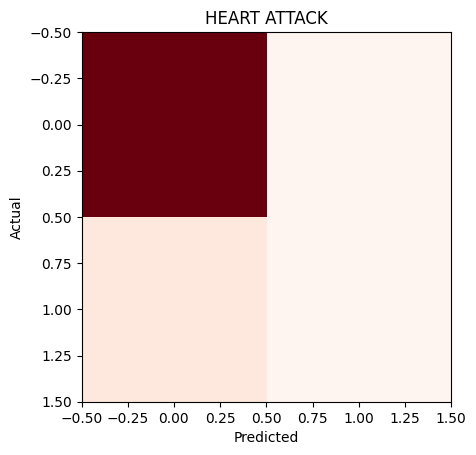

In [30]:
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, cmap="Reds")
plt.title("HEART ATTACK")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

100%|===================| 61759/61771 [33:30<00:00]       

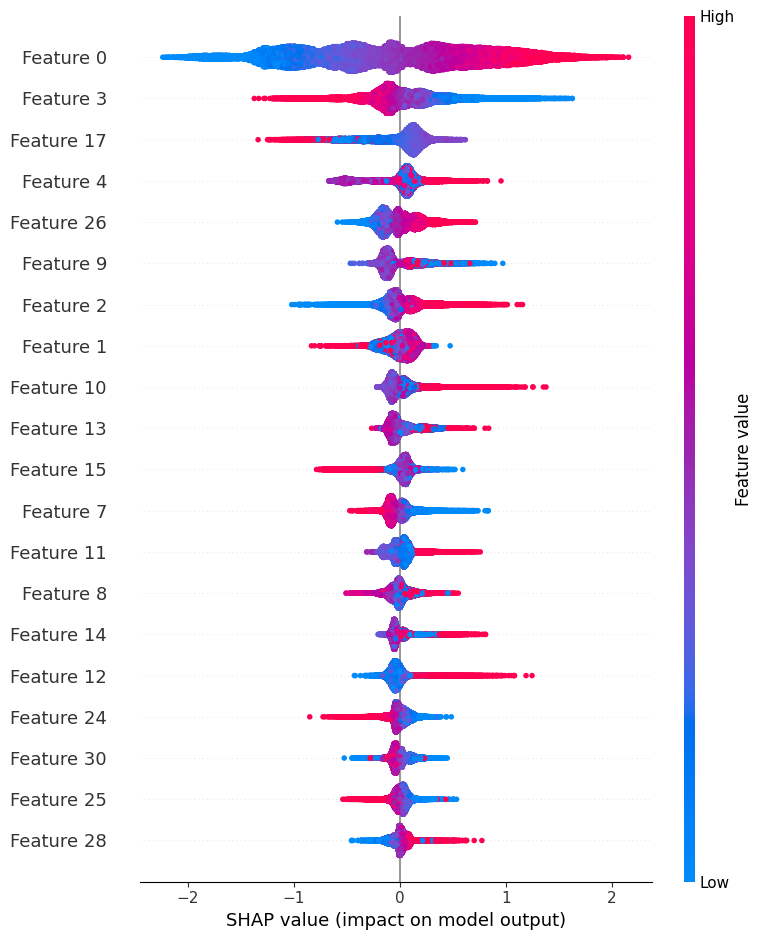

In [31]:
# SHAP ANALYSIS
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test)


Manual Sample Prediction Result:
No Heart Disease

Generated Manual Sample Data:
  General_Health Checkup Exercise Skin_Cancer Other_Cancer Depression  \
0           poor   never      Yes          No           No        yes   

  Diabetes Arthritis   Sex Age_Category  Height_(cm)  Weight_(kg)  \
0      yes        No  Male          80+          100         79.5   

  Smoking_History  Alcohol_Consumption  Fruit_Consumption  \
0             yes                   10                 70   

   Green_Vegetables_Consumption  FriedPotato_Consumption   BMI  
0                           100                      100  79.5  

SHAP Waterfall Plot for Manual Sample:


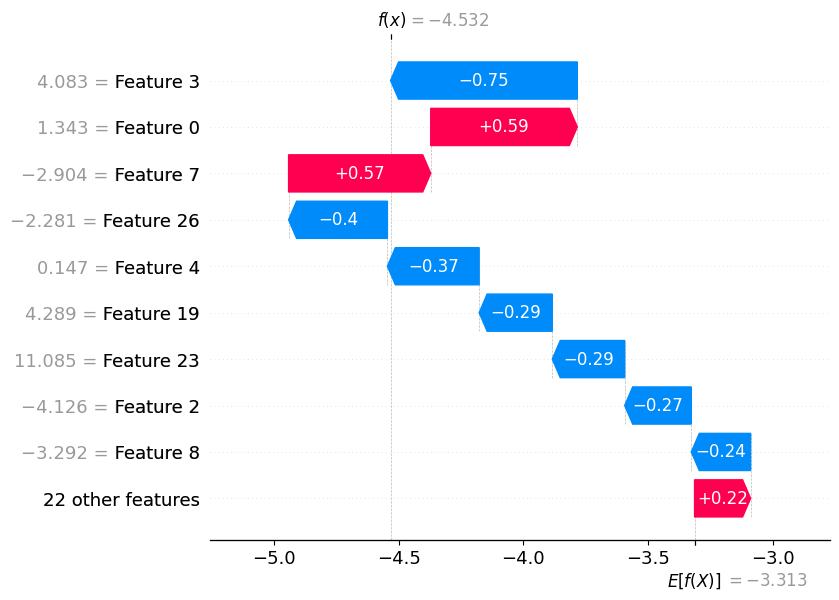

In [39]:
# Manual input for testing the model
# Modify these values to test different scenarios
manual_sample_data = {
    'General_Health': 'poor',           # Options: 'Poor', 'Fair', 'Good', 'Very Good', 'Excellent'
    'Checkup': 'never',   # Options: 'Never', 'Within the past year', 'Within the past 2 years', 'Within the past 5 years', '5 or more years ago'
    'Exercise': 'Yes',                    # Options: 'Yes', 'No'
    'Skin_Cancer': 'No',                  # Options: 'Yes', 'No'
    'Other_Cancer': 'No',                   # Options: 'Yes', 'No'
    'Depression': 'yes',                     # Options: 'Yes', 'No'
    'Diabetes': 'yes',                      # Options: 'No', 'Yes', 'No, pre-diabetes or borderline diabetes', 'Yes, but female during pregnancy'
    'Arthritis': 'No',                     # Options: 'Yes', 'No'
    'Sex': 'Male',                      # Options: 'Male', 'Female'
    'Age_Category': '80+',          # Options: '18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80+'
    'Height_(cm)': 100,                     # Unit: centimeters
    'Weight_(kg)': 79.5,                   # Unit: kilograms
    'Smoking_History': 'yes',             # Options: 'Yes', 'No'
    'Alcohol_Consumption': 10,           # Unit: drinks per week (approximate)
    'Fruit_Consumption': 70,               # Unit: servings per month (approximate)
    'Green_Vegetables_Consumption': 100,          # Unit: servings per month (approximate)
    'FriedPotato_Consumption': 100            # Unit: servings per month (approximate)
}

# Calculate BMI from height and weight
height_m = manual_sample_data['Height_(cm)'] / 100
manual_sample_data['BMI'] = manual_sample_data['Weight_(kg)'] / (height_m ** 2) # Body Mass Index (calculated from height and weight)

manual_sample_df = pd.DataFrame([manual_sample_data])

original_X_columns = X_encoded.columns

manual_sample_encoded = pd.get_dummies(manual_sample_df, drop_first=True)

manual_sample_aligned = manual_sample_encoded.reindex(columns=original_X_columns, fill_value=0)

manual_sample_scaled = scaler.transform(manual_sample_aligned)

manual_sample_pca = pca.transform(manual_sample_scaled)

manual_prediction = model.predict(manual_sample_pca)

print("\nManual Sample Prediction Result:")
print("Heart Disease" if manual_prediction[0] == 1 else "No Heart Disease")

print("\nGenerated Manual Sample Data:")
print(manual_sample_df)

# SHAP analysis for the manual sample
explainer = shap.Explainer(model, X_train)
shap_values_manual = explainer(manual_sample_pca)

print("\nSHAP Waterfall Plot for Manual Sample:")
shap.plots.waterfall(shap_values_manual[0])